# Advanced stuff 

You should now have a very solid understanding of the basic functioning of `matplotlib`, and how to add elements and style them in your plots. Let's now move on to more advanced features!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Here are some data sets we'll be using to make some example plots:

In [2]:
data1, data2, data3 = np.random.randn(3, 100)  # make 3 random data sets
x = np.arange(len(data1))

## Combining plots

Let's first see how to properly combine multiple plots on the same figure.

Multiple Axes can be added a number of ways, but the most basic is passing a tuple of `(nr_rows, nr_columns)` to `plt.subplots()`, as shown below: 


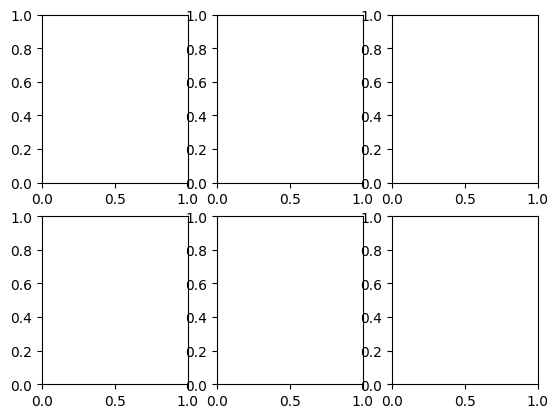

In [3]:
fig, axes = plt.subplots(2, 3)

As you can see, this creates some overlap between subplots. So this will allow us to introduce an important argument of all functions creating a Figure: the `layout` argument. When set to `"constrained"`, it allows you to automatically make subplots fit in a figure, without them overlapping:

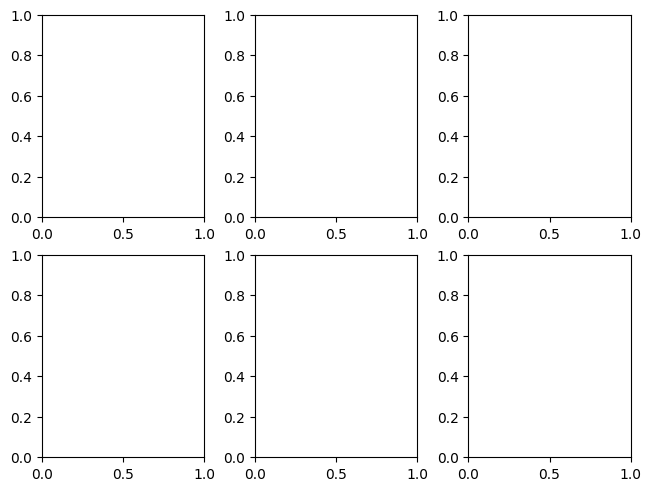

In [4]:
fig, axes = plt.subplots(2, 3, layout="constrained")

One can achieve more complex layouts, with Axes objects spanning columns or rows, using `plt.subplot_mosaic()`.

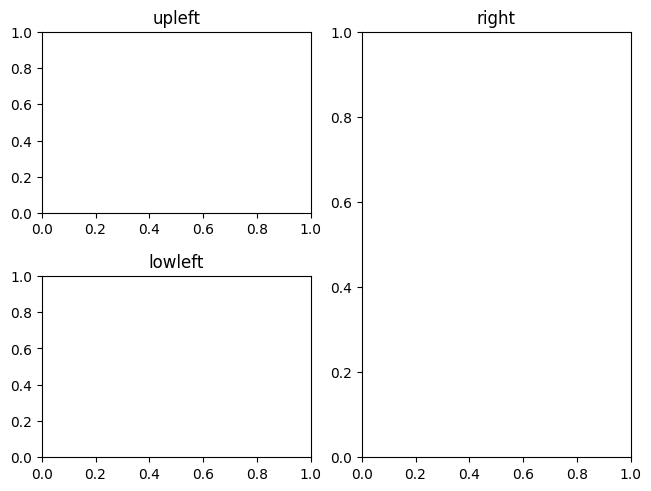

In [5]:
fig, axd = plt.subplot_mosaic(
    [
        ["upleft", "right"],
        ["lowleft", "right"],
    ],
    layout="constrained",
)
for label, ax in axd.items():
    ax.set_title(label)

As you can see, it reproduces the layout that can already be visualized from the list of lists passed as a first argument.

```{admonition} Question
You can also see that repeating a label can be used to make an Axes span more than one row. How would you then create a figure with three Axes on the first row, and a single one on a second row, which spans the whole width of the figure?
```

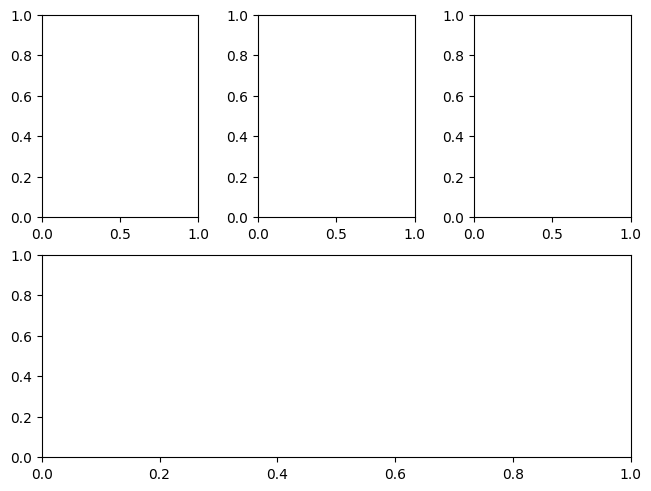

In [7]:
fig

```{note}
While `plt.subplots()` returns a list or a list of lists of Axes, `plt.subplot_mosaic()` returns a dictionary of Axes. That's one of the reason that makes `plt.subplot_mosaic()` a better choice, generally. Indeed, to get a specific Axes, you just need to specify its label, which is much more natural and convenient than to remember where it is placed on your figure, and how that translates to indices in the list of lists of Axes.
```

```{seealso}
To see all the customisation that `plt.subplot_mosaic()` enables, check out its [associated guide](https://matplotlib.org/stable/users/explain/axes/mosaic.html).
```

## Axis scales and ticks

Each Axes has two (or three) `Axis` objects representing the x- and
y-axis. These control the *scale* of the Axis, the tick *locators* and the
tick *formatters*.

### Scales

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale.
The usual way to set a different scale is through `Axes.set_yscale()` (and the equivalent `Axes.set_xscale()`):

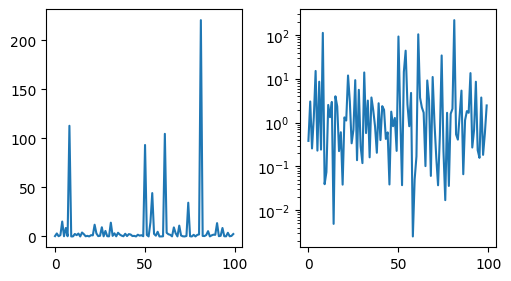

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
data = 10**data1
axs[0].plot(x, data)

axs[1].plot(x, data)
axs[1].set_yscale('log');

```{seealso}
There are a number of scales (see the [Axis scales guide](https://matplotlib.org/stable/users/explain/axes/axes_scales.html) for other examples).
```

### Tick locators and formatters

Each Axis has a tick *locator*  that positions the tick marks along it,
and a *formatter* that determines the format of the tick labels.
A simple interface to this is `Axes.set_xticks` and `Axes.set_yticks`:

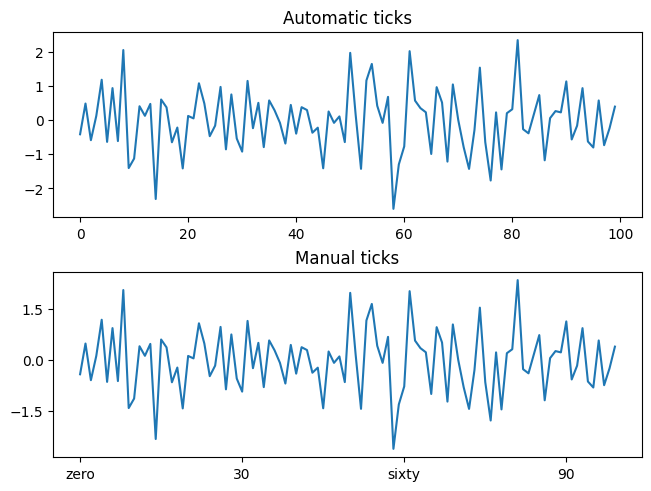

In [9]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(x, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(x, data1)
# On the x axis, set the location of the ticks and the associated labels, using
# `Axes.set_xticks()`:
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
# On the y axis, only set the location of the ticks, that will be formatted
# automatically, this time using `Axis.set_ticks()`:
axs[1].yaxis.set_ticks([-1.5, 0, 1.5])
axs[1].set_title('Manual ticks');

```{seealso}
No need to know more than that for this course, but for full control over your axis ticks, see the guides on [Tick locators](https://matplotlib.org/stable/gallery/ticks/tick-locators.html) and on [Tick formatters](https://matplotlib.org/stable/gallery/ticks/tick-formatters.html).
```

### Plotting dates and strings

Your input data is not always comprised of numbers. Sometimes, you want to plot the evolution of some variable with time, or how many times a word appeared in some text, for instance.

Fortunately, Matplotlib can handle plotting arrays of dates or of strings. To that end, these data types get special locators and formatters, so we'll show some examples, just so you're aware of these possibilities.

For instance, for dates:

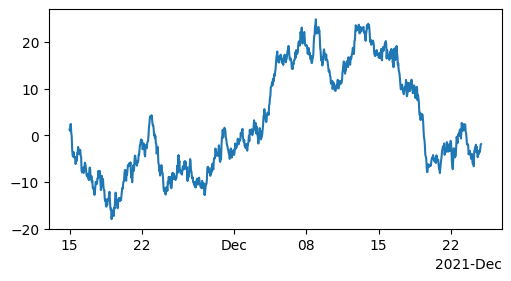

In [10]:
from matplotlib.dates import ConciseDateFormatter

fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
dates = np.arange(
    np.datetime64("2021-11-15"), np.datetime64("2021-12-25"), np.timedelta64(1, "h")
)
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

As you can see, the `formatter` needs to be linked to a `locator`, here we just took the existing one.

```{seealso}
For more information see the [date examples](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html).
```

For strings, we get categorical plotting automatically:

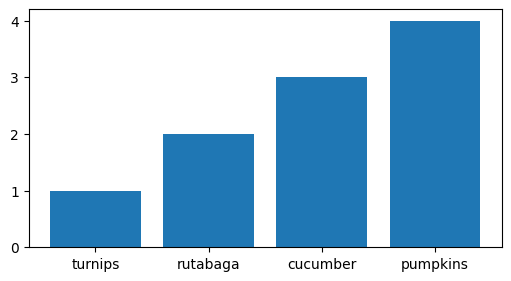

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, [1, 2, 3, 4]);

One caveat about categorical plotting is that some methods of parsing
text files return a list of strings, even if the strings all represent
numbers or dates.  If you pass 1000 strings, Matplotlib will think you
meant 1000 categories and will add 1000 ticks to your plot!

```{seealso}
This section was just a preview of what you can find in the [`Plotting dates and strings guide`](https://matplotlib.org/stable/users/explain/axes/axes_units.html).
```

### Exercise - sin(x) + 3 

✪✪✪ Try to display the function `y = sin(x) + 3`  for x at pi / 4 intervals, from 0 to 7π/4, both included. Use exactly 8 ticks.

Use `numpy` here! For pi, use constant `np.pi`. Try to decide which of `np.arange` or `np.linspace` is more convenient here.

For each tick, use the label sequence `"0π/4", "1π/4" , "2π/4",  "3π/4" ,  "4π/4", "5π/4",   ....`  . Obviously writing them by hand is easy, try instead to devise a method that works for any number of ticks. What is changing in the sequence? What is constant? What is the type of the part changes ? What is final type of the labels you want to obtain ?

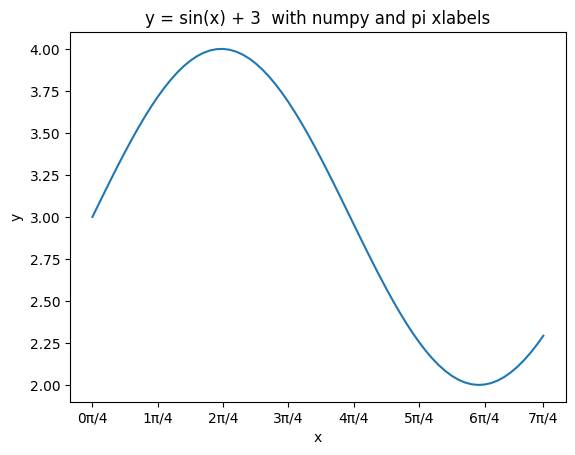

In [13]:
fig

### Exercise - chemical elements

✪✪✪ Given multiple lists representig data about chemical elements, show a bar plot where elements are sorted alphabetically according to their name. 

- show elements as _name (symbol)_

**REMEMBER** title and axis labels, make sure all texts are clearly visible

**HINT**: This is quite challenging, you need some sorting trick - First read the [Python documentation](https://docs.python.org/3/howto/sorting.html#key-functions) and then:

1. create a list of couples (list of tuples) where each tuple is the node identifier and the corresponding weight
2. sort the list by using the second value of the tuples as a key. 

In [14]:
symbols = ["H", "He", "Li", "Be", "B", "C", "N"]
names = ["hydrogen", "helium", "lithium", "beryllium", "boron", "carbon", "nitrogen"]
atomic_weight = [1.008, 4.0026, 6.94, 9.0122, 10.81, 12.011, 14.007]

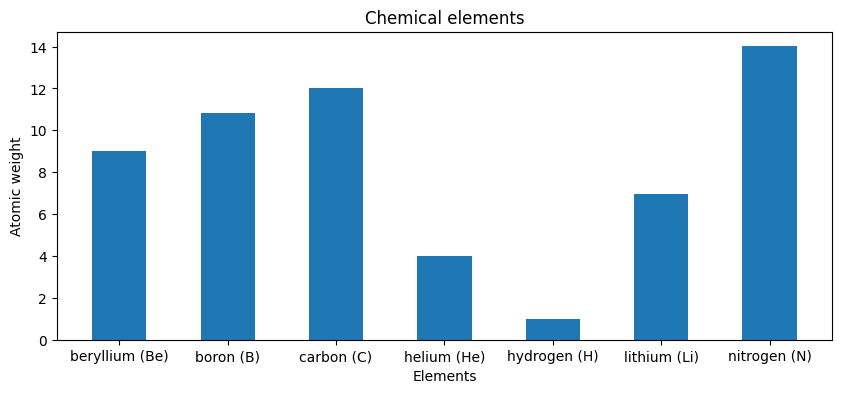

In [16]:
fig


### Exercise - superheroes

✪✪✪✪ Each year a contest  between the super-heroes of two crime-ridden cities is held. The superheroes perform several challenges and each city receives a score. At the end, the mayor of each city wants to see how its city fared compared to the other. The mayor wants you to show the performances in **sorted** order with respect to the mayor's `city`, while showing also the performance of the other city for comparison. 

Look at [this example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html) for inspiration, and make a double bar chart

- specify the city in the title
- remember x and y axis labels

In [17]:
d = {
    "Punching glasses": (1, 5),
    "Kicking the tires": (6, 5),
    "Throwing cars": (5.5, 6),
    "Hot oil bath": (3, 7),
    "Jumping on the wall": (1.5, 4),
    "Arresting mutants": (4, 3),
}

city = "Gotham City"
cities = ["Gotham City", "Metropolis"]

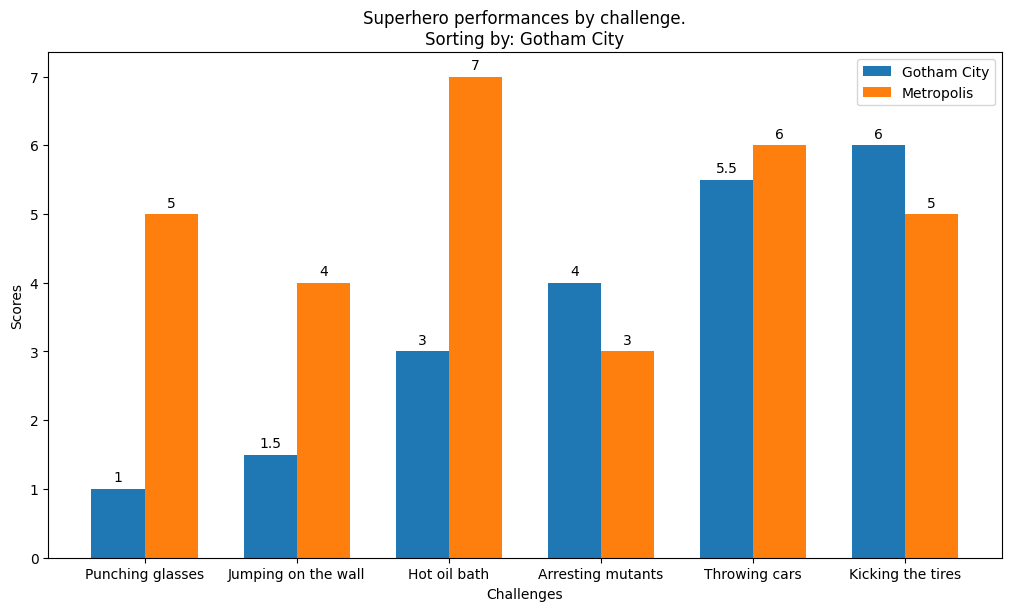

In [19]:
fig

## Color mapped data

### `cmap` and `norm`

Often we want to have a third dimension in a plot represented by colors in
a colormap. Let's first see some examples on a plot type we know well, the scatter plot:

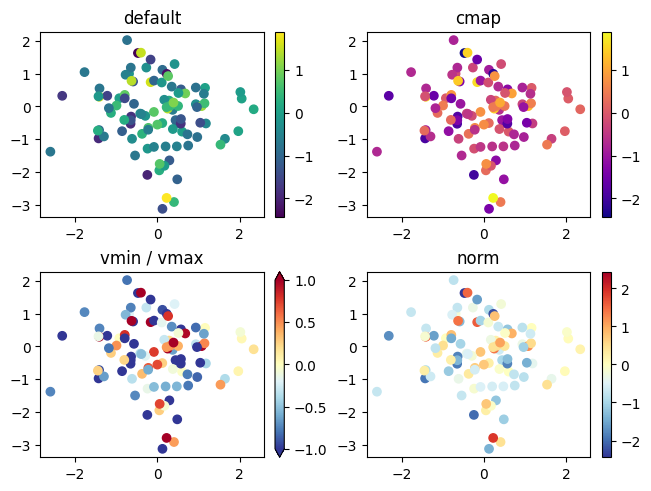

In [20]:
from matplotlib.colors import CenteredNorm

fig, axd = plt.subplot_mosaic(
    [
        ["default", "cmap"],
        ["vmin / vmax", "norm"],
    ],
    layout="constrained",
)

ax = axd["default"]
pc = ax.scatter(data1, data2, c=data3)
fig.colorbar(pc, ax=ax)
ax.set_title("default")

ax = axd["cmap"]
pc = ax.scatter(data1, data2, c=data3, cmap="plasma")
fig.colorbar(pc, ax=ax)
ax.set_title("cmap")

ax = axd["vmin / vmax"]
pc = ax.scatter(data1, data2, c=data3, vmin=-1, vmax=1, cmap="RdYlBu_r")
fig.colorbar(pc, ax=ax, extend="both")
ax.set_title("vmin / vmax")

ax = axd["norm"]
pc = ax.scatter(data1, data2, c=data3, norm=CenteredNorm(vcenter=0), cmap="RdYlBu_r")
fig.colorbar(pc, ax=ax)
ax.set_title("norm");

So in all cases above, we passed to `scatter` the values based on which the colors should be chosen from the argument `c`.

If no other argument is passed, it uses a default colormap and uses the whole range of values.
To change from this default, we can use the argument `cmap`, here giving the name of a specific colormap.

```{seealso}
Matplotlib has [many colormaps to choose from](https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps), and you can [make your own](https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html#colormap-manipulation), or even download some as [third-party packages](https://matplotlib.org/mpl-third-party/#colormaps-and-styles).
```

Then, to use a different range of values for the coloring, we can first use `vmin` and/or `vmax`, to set the values to which the color at the beginning / end of `cmap` correspond to, respectively.
All values outside the range `[vmin, vmax]` will then take a color from their corresponding end of the colormap, thus applying some kind of thresholding.
Hence why we passed `extend="both"` to the `colorbar()`, in order to show we applied such a threshold.
We can also use a different mapping of data to the colormap than the default, which is a linear one between two values.
In the example above, we used a `CenteredNorm`, that automatically will center the colormap around a given value.

```{seealso}
Matplotlib offers many way to map data values to colors, see the [Colormap normalization guide](https://matplotlib.org/stable/users/explain/colors/colormapnorms.html) for more info.
```

### Plot types with colormaps

Matplotlib has a number of other plot types that can map data values to colors:

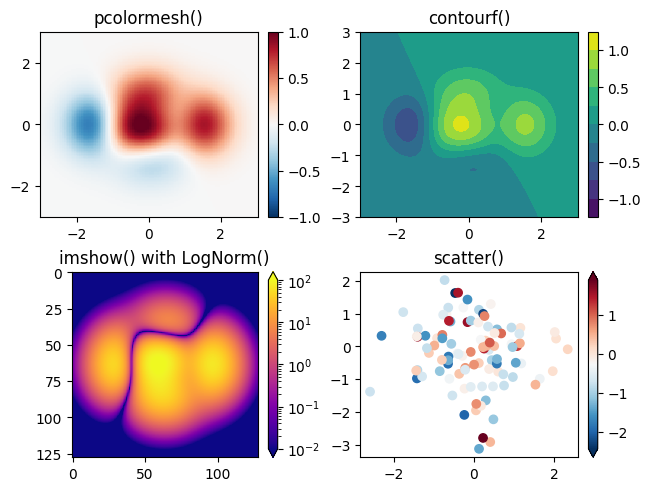

In [21]:
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X / 2 + X**5 + Y**3) * np.exp(-(X**2) - Y**2)

fig, axd = plt.subplot_mosaic(
    [
        ["pcolormesh", "contourf"],
        ["imshow", "scatter"],
    ],
    layout="constrained",
)

ax = axd["pcolormesh"]
pc = ax.pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap="RdBu_r")
fig.colorbar(pc, ax=ax)
ax.set_title("pcolormesh()")

ax = axd["contourf"]
co = ax.contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=ax)
ax.set_title("contourf()")

ax = axd["imshow"]
pc = ax.imshow(Z**2 * 100, cmap="plasma", norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=ax, extend="both")
ax.set_title("imshow() with LogNorm()")

ax = axd["scatter"]
pc = ax.scatter(data1, data2, c=data3, cmap="RdBu_r")
fig.colorbar(pc, ax=ax, extend="both")
ax.set_title("scatter()");

These are all examples of Artists that derive from  `ScalarMappable`
objects. What this means is that they all can set a linear mapping between *vmin* and *vmax* into
the colormap specified by *cmap*, to display a color depending on the numerical values they're passed

### Colorbars

Adding a `Figure.colorbar` gives a key to relate the color back to the
underlying data. Colorbars are figure-level Artists, and are attached to
a ScalarMappable (where they get their information about the norm and
colormap) and usually steal space from a parent Axes. Placement of
colorbars can be complex: see
the [colorbar placement guide](https://matplotlib.org/stable/users/explain/axes/colorbar_placement.html) for
details.  You can also change the appearance of colorbars with the
*extend* keyword to add arrows to the ends, and *shrink* and *aspect* to
control the size.  Finally, the colorbar will have default locators
and formatters appropriate to the norm.  These can be changed as for
other Axis objects.

## Making helper functions

If you need to make the same plots over and over again with different data
sets, or want to easily wrap Matplotlib methods, you may use a function similar to the one below:


In [22]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

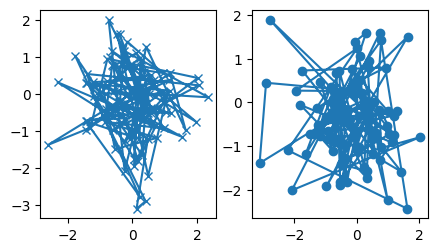

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data2, data3, {'marker': 'o'});

The most important part here is that this plotter function takes an `ax` as an argument. It then allows you to call this function to make a plot in whichever Axes of any Figure.

### Exercise - sin(kx)

Given a list `ks` containing $n$ floats, show $n$ plots stacked vertically of the functions $sin(k x)$, plotted between the two numbers `left` and `right`.

- display the `k` values as titles
- define a function `plot_sin` to be called $n$ times
- put adequate vertical space
- don't necessarily follow exactly the function template shown above!

- **HINT**: use numpy vector operations

In [24]:
ks = [1, 2, 3]

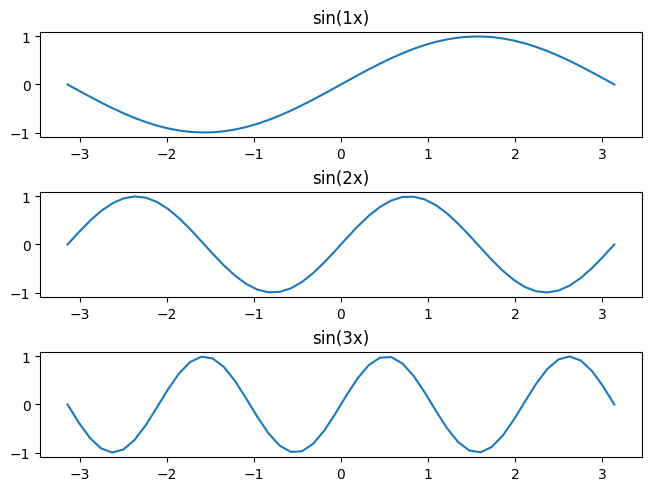

In [26]:
fig